In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations

## Logistic Regression - Multinomial

In [2]:
class logistic():
    
    def __init__(self):
        self.weight, self_bias = 0, 0
        
    def show(self):  
        print("Logistic Regression") 
        
    def logisctic_sigmoid_func(self, x):
        return 1 / (1 + np.exp(-x))
    
    def mse(self, y, pred):
        return np.sum((y - pred) ** 2 ) / len(y)

    def fit_train(self, x, y, iter = 100, learning_rate = 0.01):
        self.weight,self.bias = np.zeros(shape=(x.shape[1], 1)), 0
        y_predicted_value = []
        mse_list=[]
        print("Current Iteration and Mean Squared Errror")
        print("-----------------------------------------")
        number = []
        plt_mse =[]
        for _ in range(iter):
            total_inputs = len(x)
            batch_size = 32
            for i in range(0, total_inputs+1, batch_size):
                batch_start=i
                batch_stop = i + batch_size
                X_batch, y_batch = x[batch_start:batch_stop,:], y[batch_start:batch_stop]
                
                for input_x, ele in enumerate(X_batch):
                    ele = ele.reshape(-1, 1)
                    y_ele = y_batch[input_x]
                    predicted_value = (self.weight.T @ ele + self.bias)
                    losgistic_function = self.logisctic_sigmoid_func(predicted_value)
                    if losgistic_function > 0.5:
                        predicted_value = 1

                    else:
                        predicted_value = -1

                    self.weight = self.weight -  learning_rate *(predicted_value - y_ele)* ele 
                    self.bias = self.bias - learning_rate * (predicted_value - y_ele)
                    y_predicted_value.append(predicted_value)
                    
                number.append(_)
                    
                arr = np.array(y_predicted_value)
                
                mse = sum((y_batch - arr)**2) / len(y_batch)
                plt_mse.append(mse)
                y_predicted_value = []
            print("Iteration: ", _ ," & ","Mean Squared Error: ",round(mse, 2))
            print()
            
        # plot mse
        plt.figure(figsize=(14,12))
        plt.plot(number, plt_mse)
        plt.scatter(number, plt_mse, marker="*", c= '#bcbd22', cmap='Greens', edgecolors="Orange")
        plt.show()
                     
    def predict(self, x_test):
        predicted_list = []
        for ele in x_test:
            predicted_value = (self.weight.T @ ele + self.bias).reshape(-1)
            losgistic_function = self.logisctic_sigmoid_func(predicted_value)
            if losgistic_function > 0.5:
                predicted_value = 1     
            else:
                predicted_value = -1
            predicted_list.append(predicted_value)
        return predicted_list              

## Load Data

**Created Target column dataframe**

In [3]:
data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
df1 = [df["sepal length (cm)"], df["sepal width (cm)"]]
df1_cols = ["sepal length (cm)", "sepal width (cm)"]
df1 = pd.concat(df1, axis=1, keys=df1_cols)

##  6 logistic regression models to the training data with parameters w = [w0, w1, w2] for each one.

In [5]:

all_combinations = list(combinations(list(range(4)), 2))
count = 1
for i in all_combinations:
    print("Combination:",count," ",df.columns[i[0]],',',df.columns[i[1]], i)
    count += 1

Combination: 1   sepal length (cm) , sepal width (cm) (0, 1)
Combination: 2   sepal length (cm) , petal length (cm) (0, 2)
Combination: 3   sepal length (cm) , petal width (cm) (0, 3)
Combination: 4   sepal width (cm) , petal length (cm) (1, 2)
Combination: 5   sepal width (cm) , petal width (cm) (1, 3)
Combination: 6   petal length (cm) , petal width (cm) (2, 3)


In [6]:
df1 = [df["sepal length (cm)"], df["sepal width (cm)"]]
df1_cols = ["sepal length (cm)", "sepal width (cm)"]
df1 = pd.concat(df1, axis=1, keys=df1_cols)

df2 = [df["sepal length (cm)"], df["petal length (cm)"]]
df2_cols = ["sepal length (cm)", "petal length (cm)"]
df2 = pd.concat(df2, axis=1, keys=df2_cols)

df3 = [df["sepal length (cm)"], df["petal width (cm)"]]
df3_cols = ["sepal length (cm)", "petal width (cm)"]
df3 = pd.concat(df3, axis=1, keys=df3_cols)


df4 = [df["sepal width (cm)"], df["petal length (cm)"]]
df4_cols = ["sepal width (cm)", "petal length (cm)"]
df4 = pd.concat(df4, axis=1, keys=df4_cols)

df5 = [df["sepal width (cm)"], df["petal width (cm)"]]
df5_cols = ["sepal width (cm)", "petal width (cm)"]
df5 = pd.concat(df5, axis=1, keys=df5_cols)

df6 = [df["petal length (cm)"], df["petal width (cm)"]]
df6_cols = ["petal length (cm)", "petal width (cm)"]
df6 = pd.concat(df6, axis=1, keys=df5_cols)

In [7]:
X1 = df1.values
X2 = df2.values
X3 = df3.values
X4 = df4.values
X5 = df5.values
X6 = df6.values
y = df.iloc[:, 4].values

##  logistic regression models to the training data with parameters w= [w0,w1,w2] for each one.

### Model 1

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.1, random_state=42)

# y train for setosa
y_train_setosa = np.where(y_train == 0, 1, -1)

# y train for versicolor
y_train_versicolor = np.where(y_train == 1, 1, -1)

# y train for verginica
y_train_verginica = np.where(y_train == 2, 1, -1)

# y train for setosa
y_test_setosa = np.where(y_test == 0, 1, -1)

# y train for versicolor
y_test_versicolor = np.where(y_test == 1, 1, -1)

# y train for verginica
y_test_verginica = np.where(y_test == 2, 1, -1)

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  2.29

Iteration:  1  &  Mean Squared Error:  2.29

Iteration:  2  &  Mean Squared Error:  2.29

Iteration:  3  &  Mean Squared Error:  1.14

Iteration:  4  &  Mean Squared Error:  1.14

Iteration:  5  &  Mean Squared Error:  1.71

Iteration:  6  &  Mean Squared Error:  0.0

Iteration:  7  &  Mean Squared Error:  1.14

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  1.14

Iteration:  10  &  Mean Squared Error:  0.57

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  1.14

Iteration:  13  &  Mean Squared Error:  0.0

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.0

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  19  &  Mean Squared Error:  0.0

Iteration:  20  

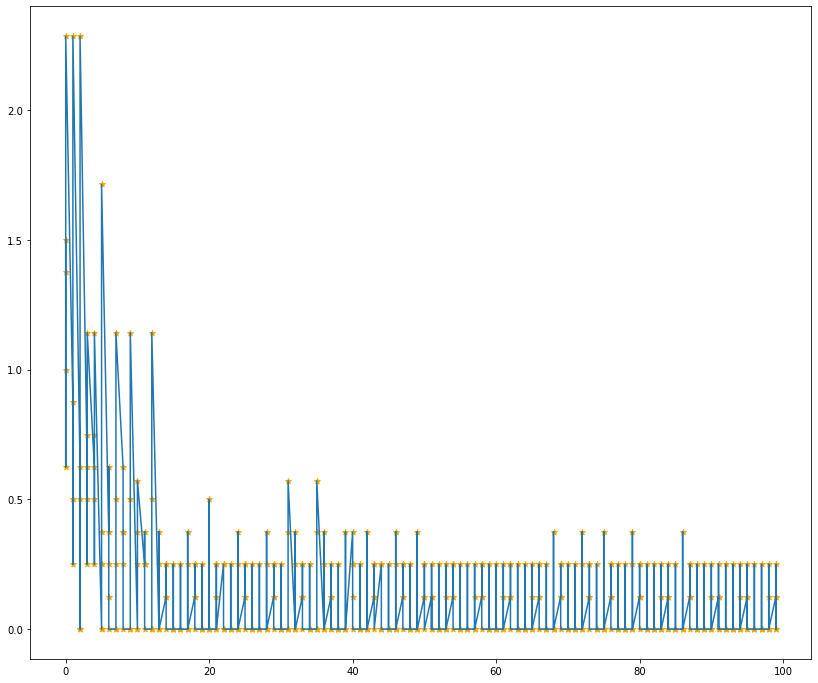

Accuracy Score for Setosa:  1.0
Mean Square Error:  0.0

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  2.29

Iteration:  1  &  Mean Squared Error:  2.29

Iteration:  2  &  Mean Squared Error:  2.29

Iteration:  3  &  Mean Squared Error:  2.29

Iteration:  4  &  Mean Squared Error:  2.29

Iteration:  5  &  Mean Squared Error:  2.29

Iteration:  6  &  Mean Squared Error:  2.29

Iteration:  7  &  Mean Squared Error:  2.29

Iteration:  8  &  Mean Squared Error:  2.29

Iteration:  9  &  Mean Squared Error:  2.29

Iteration:  10  &  Mean Squared Error:  2.29

Iteration:  11  &  Mean Squared Error:  2.29

Iteration:  12  &  Mean Squared Error:  2.29

Iteration:  13  &  Mean Squared Error:  2.29

Iteration:  14  &  Mean Squared Error:  1.71

Iteration:  15  &  Mean Squared Error:  2.29

Iteration:  16  &  Mean Squared Error:  2.29

Iteration:  17  &  Mean Squared Error:  1.71

Iteration:  18  &  Mean Squared Error:  2

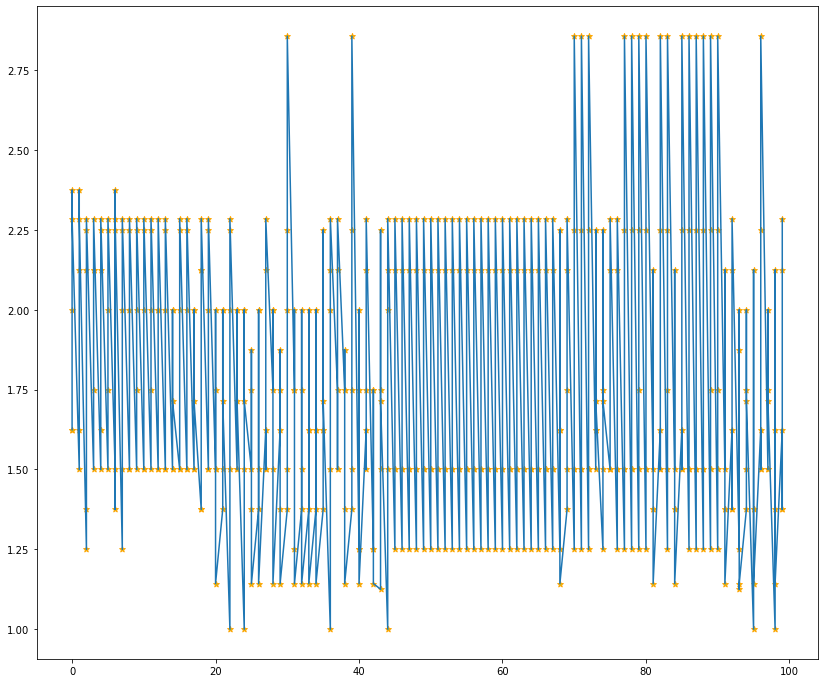

Accuracy Score for versicolor:  0.6666666666666666
Mean Squared Error:  1.3333333333333333

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  2.86

Iteration:  1  &  Mean Squared Error:  2.29

Iteration:  2  &  Mean Squared Error:  2.86

Iteration:  3  &  Mean Squared Error:  2.29

Iteration:  4  &  Mean Squared Error:  2.29

Iteration:  5  &  Mean Squared Error:  2.29

Iteration:  6  &  Mean Squared Error:  2.29

Iteration:  7  &  Mean Squared Error:  2.29

Iteration:  8  &  Mean Squared Error:  2.29

Iteration:  9  &  Mean Squared Error:  2.29

Iteration:  10  &  Mean Squared Error:  3.43

Iteration:  11  &  Mean Squared Error:  2.29

Iteration:  12  &  Mean Squared Error:  2.29

Iteration:  13  &  Mean Squared Error:  2.29

Iteration:  14  &  Mean Squared Error:  2.29

Iteration:  15  &  Mean Squared Error:  2.29

Iteration:  16  &  Mean Squared Error:  2.29

Iteration:  17  &  Mean Squared Error:  2.29

Iterat

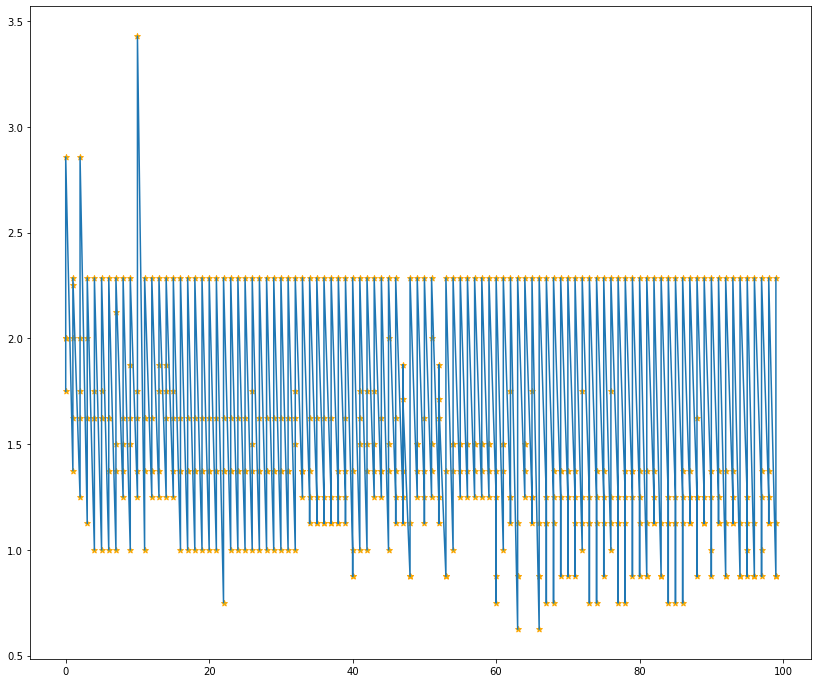

Accuracy Score for verginica:  0.8
Mean Squared Error:  0.8


In [9]:
# class: setosa 0: versicolor 1. virginica: 2

# for setosa
c1 = logistic()
c1.fit_train(X_train, y_train_setosa)
y_pred = c1.predict(X_test)
#mse on test data
mse = c1.mse(y_test_setosa, y_pred)
print("Accuracy Score for Setosa: ", accuracy_score(y_test_setosa, y_pred))
print("Mean Square Error: ", mse)
print()

# for versicolor
c2 = logistic()
c2.fit_train(X_train, y_train_versicolor)
y_pred = c2.predict(X_test)
mse = c2.mse(y_test_versicolor, y_pred)
print("Accuracy Score for versicolor: ", accuracy_score(y_test_versicolor, y_pred))
print("Mean Squared Error: ", mse)
print()

# for virginica
c3 = logistic()
c3.fit_train(X_train, y_train_verginica)
y_pred = c3.predict(X_test)
mse = c3.mse(y_test_verginica, y_pred)
print("Accuracy Score for verginica: ", accuracy_score(y_test_verginica, y_pred))
print("Mean Squared Error: ", mse)

### Model 2

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.1, random_state=42)

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  0.0

Iteration:  1  &  Mean Squared Error:  0.0

Iteration:  2  &  Mean Squared Error:  0.0

Iteration:  3  &  Mean Squared Error:  0.0

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.0

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.0

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.0

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.0

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  19  &  Mean Squared Error:  0.0

Iteration:  20  &  Mean Sq

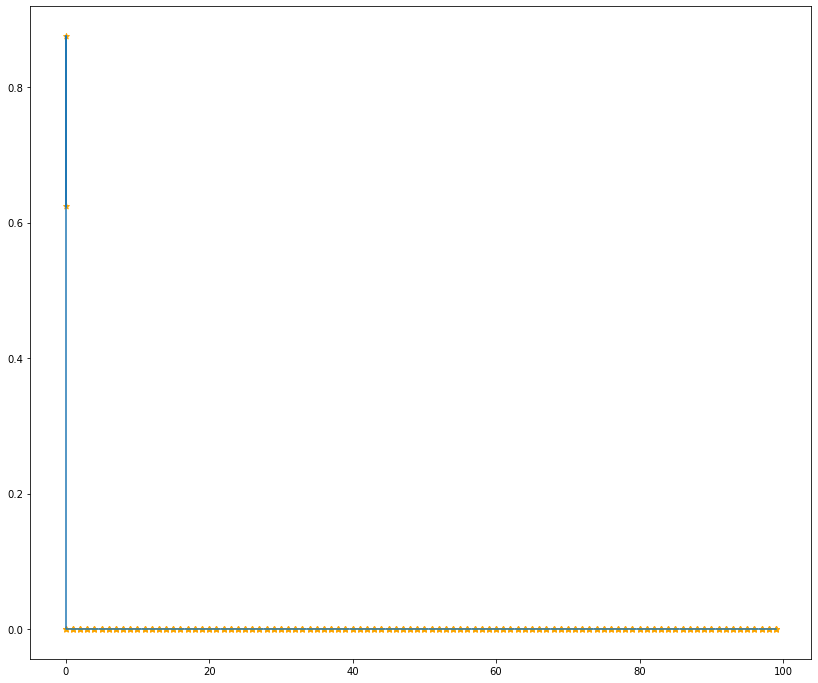

Accuracy Score for Setosa:  1.0
Mean Squared Error:  0.0

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  2.29

Iteration:  1  &  Mean Squared Error:  2.29

Iteration:  2  &  Mean Squared Error:  2.29

Iteration:  3  &  Mean Squared Error:  2.29

Iteration:  4  &  Mean Squared Error:  2.29

Iteration:  5  &  Mean Squared Error:  2.29

Iteration:  6  &  Mean Squared Error:  2.29

Iteration:  7  &  Mean Squared Error:  2.29

Iteration:  8  &  Mean Squared Error:  2.29

Iteration:  9  &  Mean Squared Error:  2.29

Iteration:  10  &  Mean Squared Error:  2.29

Iteration:  11  &  Mean Squared Error:  2.29

Iteration:  12  &  Mean Squared Error:  2.29

Iteration:  13  &  Mean Squared Error:  2.29

Iteration:  14  &  Mean Squared Error:  2.29

Iteration:  15  &  Mean Squared Error:  2.29

Iteration:  16  &  Mean Squared Error:  2.29

Iteration:  17  &  Mean Squared Error:  2.86

Iteration:  18  &  Mean Squared Error:  

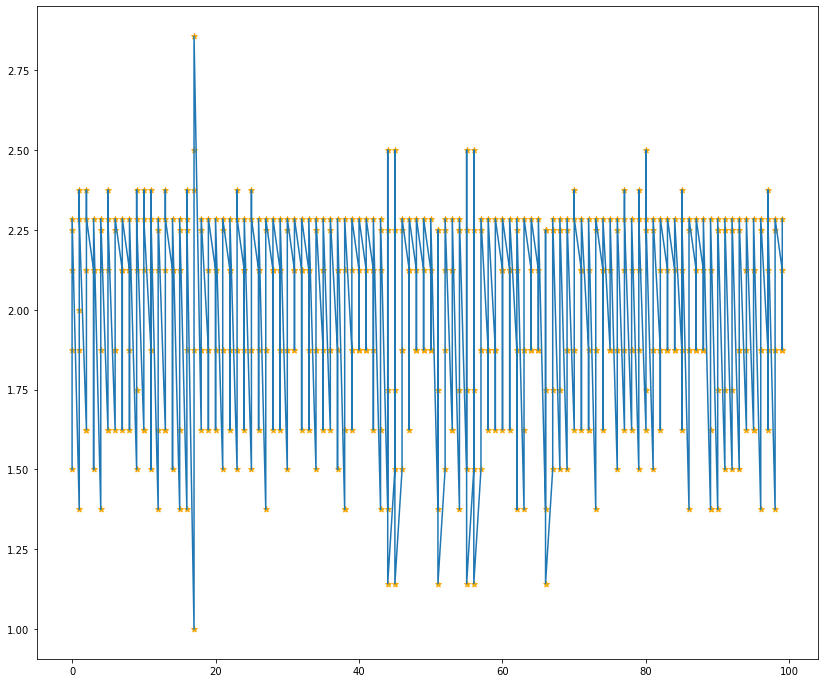

Accuracy Score for versicolor:  0.6
Mean Squared Error:  1.6

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  0.0

Iteration:  1  &  Mean Squared Error:  0.0

Iteration:  2  &  Mean Squared Error:  0.0

Iteration:  3  &  Mean Squared Error:  0.0

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.0

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.0

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.0

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.0

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration

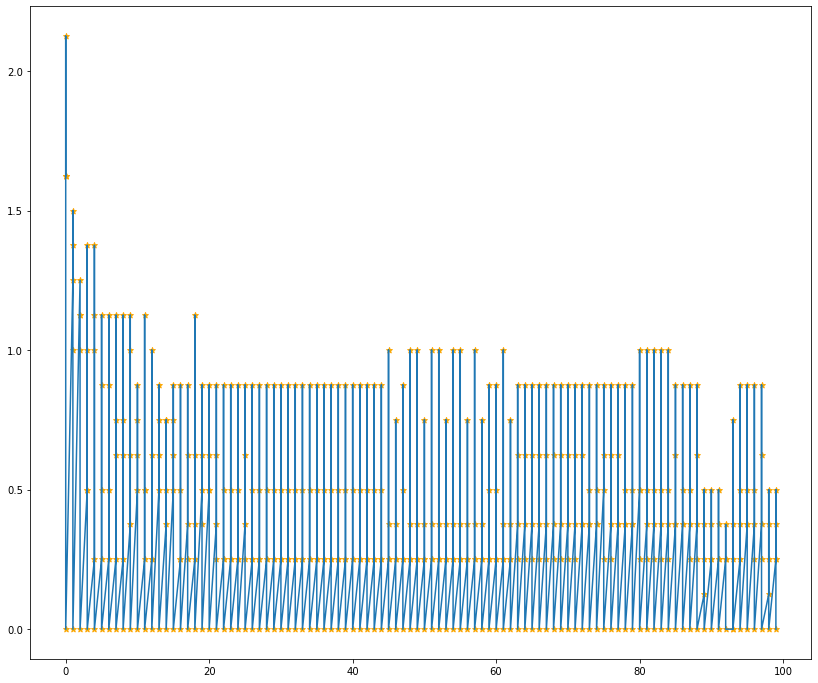

Accuracy Score for verginica:  0.8666666666666667
Mean Squared Error:  0.5333333333333333


In [11]:
# class: setosa 0: versicolor 1. virginica: 2

# for setosa
c4 = logistic()
c4.fit_train(X_train, y_train_setosa)
y_pred = c4.predict(X_test)
mse = c4.mse(y_test_setosa, y_pred)
print("Accuracy Score for Setosa: ", accuracy_score(y_test_setosa, y_pred))
print("Mean Squared Error: ", mse)
print()

# for versicolor
c5 = logistic()
c5.fit_train(X_train, y_train_versicolor)
y_pred = c5.predict(X_test)
mse = c5.mse(y_test_versicolor, y_pred)
print("Accuracy Score for versicolor: ", accuracy_score(y_test_versicolor, y_pred))
print("Mean Squared Error: ", mse)
print()

# for virginica
c6 = logistic()
c6.fit_train(X_train, y_train_verginica)
y_pred = c6.predict(X_test)
mse = c6.mse(y_test_verginica, y_pred)
print("Accuracy Score for verginica: ", accuracy_score(y_test_verginica, y_pred))
print("Mean Squared Error: ", mse)

### Model 3

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.1, random_state=42)

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  0.0

Iteration:  1  &  Mean Squared Error:  0.0

Iteration:  2  &  Mean Squared Error:  0.0

Iteration:  3  &  Mean Squared Error:  0.0

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.0

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.0

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.0

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.0

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  19  &  Mean Squared Error:  0.0

Iteration:  20  &  Mean Sq

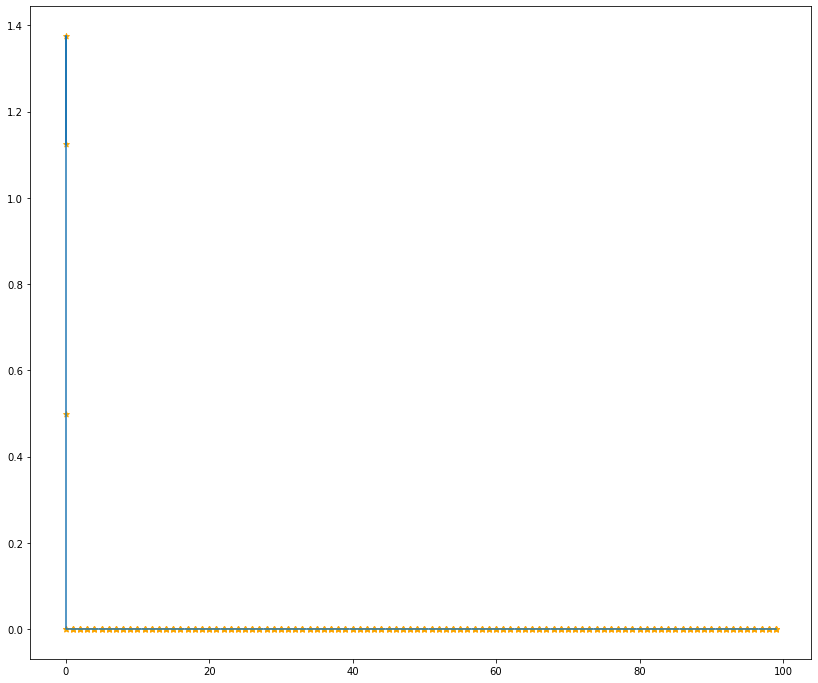

Score for Setosa:  1.0
Mean Squared Error:  0.0

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  2.29

Iteration:  1  &  Mean Squared Error:  2.86

Iteration:  2  &  Mean Squared Error:  2.29

Iteration:  3  &  Mean Squared Error:  2.29

Iteration:  4  &  Mean Squared Error:  2.86

Iteration:  5  &  Mean Squared Error:  2.86

Iteration:  6  &  Mean Squared Error:  2.86

Iteration:  7  &  Mean Squared Error:  2.29

Iteration:  8  &  Mean Squared Error:  2.86

Iteration:  9  &  Mean Squared Error:  2.86

Iteration:  10  &  Mean Squared Error:  2.86

Iteration:  11  &  Mean Squared Error:  2.86

Iteration:  12  &  Mean Squared Error:  2.29

Iteration:  13  &  Mean Squared Error:  2.86

Iteration:  14  &  Mean Squared Error:  2.29

Iteration:  15  &  Mean Squared Error:  2.86

Iteration:  16  &  Mean Squared Error:  2.86

Iteration:  17  &  Mean Squared Error:  2.86

Iteration:  18  &  Mean Squared Error:  2.86

Ite

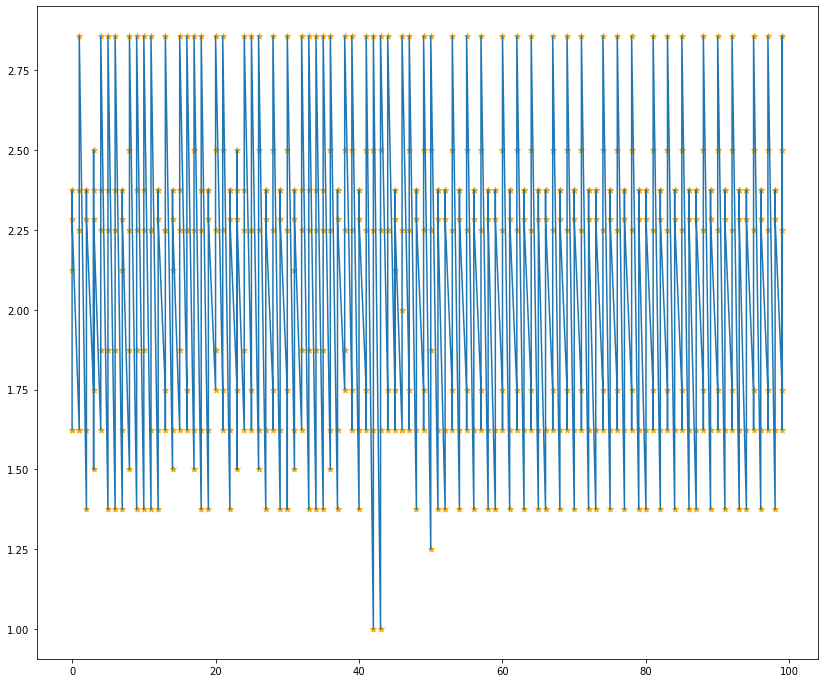

Score for versicolor:  0.6
Mean Squared Error:  1.6

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  2.29

Iteration:  1  &  Mean Squared Error:  0.0

Iteration:  2  &  Mean Squared Error:  1.14

Iteration:  3  &  Mean Squared Error:  1.71

Iteration:  4  &  Mean Squared Error:  1.71

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  1.71

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.0

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.0

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.0

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  1

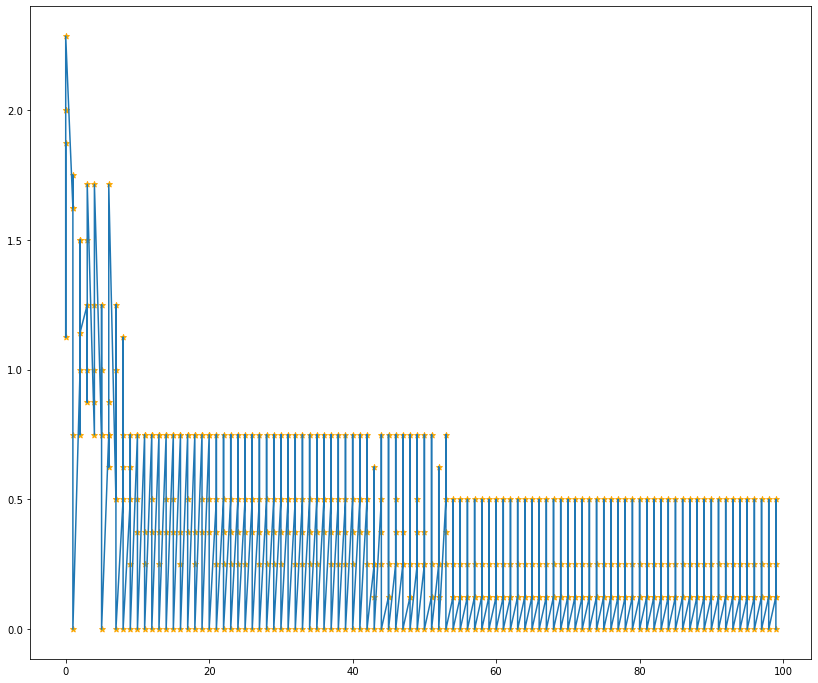

Score for verginica:  1.0
Mean Squared Error:  0.0


In [13]:
# class: setosa 0: versicolor 1. virginica: 2

# for setosa
c7 = logistic()
c7.fit_train(X_train,y_train_setosa)
y_pred = c7.predict(X_test)
mse = c7.mse(y_test_setosa, y_pred)
print("Score for Setosa: ", accuracy_score(y_test_setosa, y_pred))
print("Mean Squared Error: ", mse)
print()

# for versicolor
c8 = logistic()
c8.fit_train(X_train, y_train_versicolor)
y_pred = c8.predict(X_test)
mse = c8.mse(y_test_versicolor, y_pred)
print("Score for versicolor: ", accuracy_score(y_test_versicolor, y_pred))
print("Mean Squared Error: ", mse)
print()

# for virginica
c9 = logistic()
c9.fit_train(X_train, y_train_verginica)
y_pred = c9.predict(X_test)
mse = c9.mse(y_test_verginica, y_pred)
print("Score for verginica: ", accuracy_score(y_test_verginica, y_pred))
print("Mean Squared Error: ", mse)


### Model 4

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.1, random_state=42)

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  0.0

Iteration:  1  &  Mean Squared Error:  0.0

Iteration:  2  &  Mean Squared Error:  0.0

Iteration:  3  &  Mean Squared Error:  0.0

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.0

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.0

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.0

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.0

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  19  &  Mean Squared Error:  0.0

Iteration:  20  &  Mean Sq

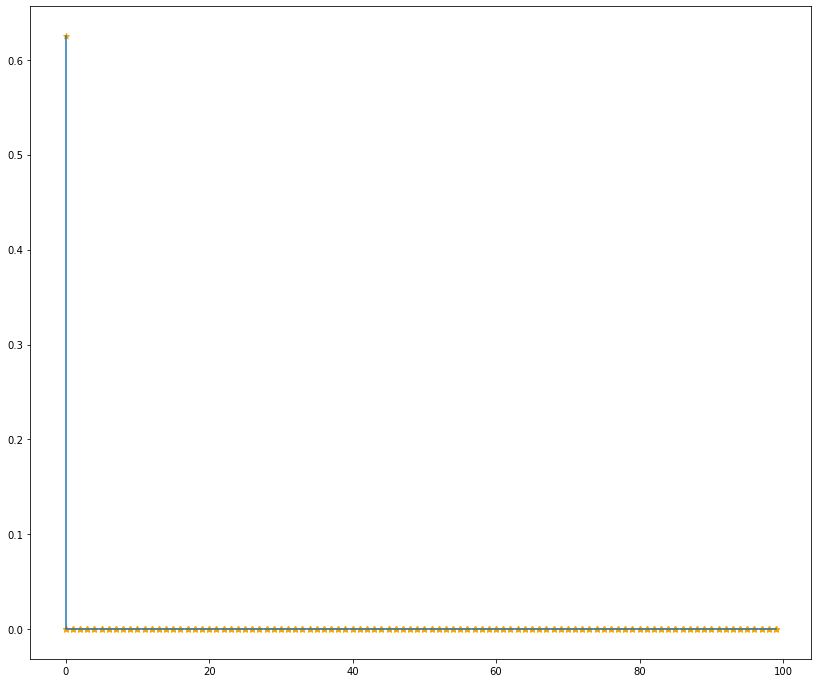

Score for Setosa:  1.0
Mean Squared Error:  0.0

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  2.29

Iteration:  1  &  Mean Squared Error:  2.29

Iteration:  2  &  Mean Squared Error:  2.29

Iteration:  3  &  Mean Squared Error:  2.29

Iteration:  4  &  Mean Squared Error:  1.71

Iteration:  5  &  Mean Squared Error:  2.29

Iteration:  6  &  Mean Squared Error:  1.71

Iteration:  7  &  Mean Squared Error:  1.71

Iteration:  8  &  Mean Squared Error:  2.29

Iteration:  9  &  Mean Squared Error:  2.29

Iteration:  10  &  Mean Squared Error:  2.29

Iteration:  11  &  Mean Squared Error:  2.29

Iteration:  12  &  Mean Squared Error:  1.71

Iteration:  13  &  Mean Squared Error:  2.29

Iteration:  14  &  Mean Squared Error:  1.71

Iteration:  15  &  Mean Squared Error:  1.71

Iteration:  16  &  Mean Squared Error:  2.29

Iteration:  17  &  Mean Squared Error:  1.71

Iteration:  18  &  Mean Squared Error:  0.57

Ite

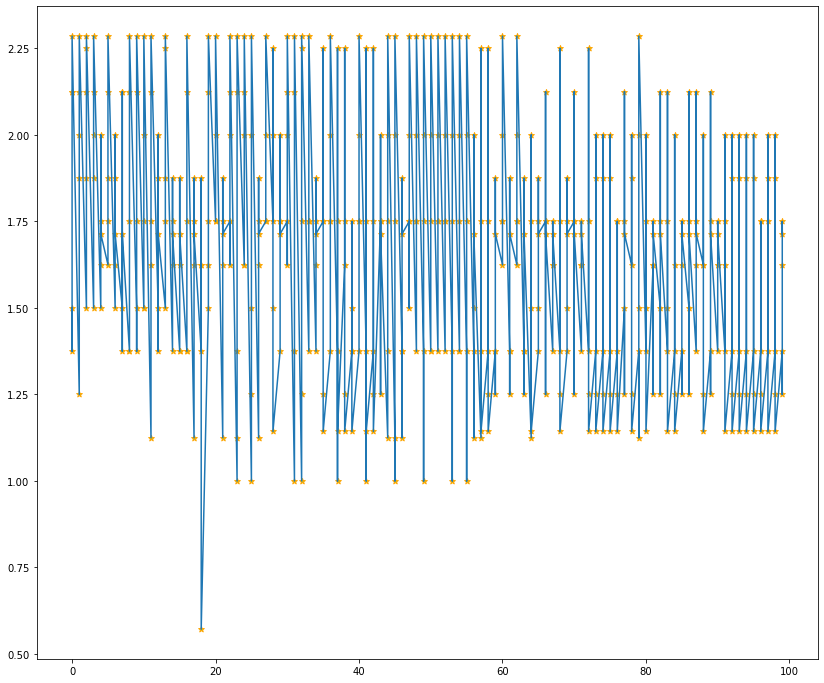

Score for versicolor:  0.6666666666666666
Mean Squared Error:  1.3333333333333333

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  1.71

Iteration:  1  &  Mean Squared Error:  1.14

Iteration:  2  &  Mean Squared Error:  0.57

Iteration:  3  &  Mean Squared Error:  0.57

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.57

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.57

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.57

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.57

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean S

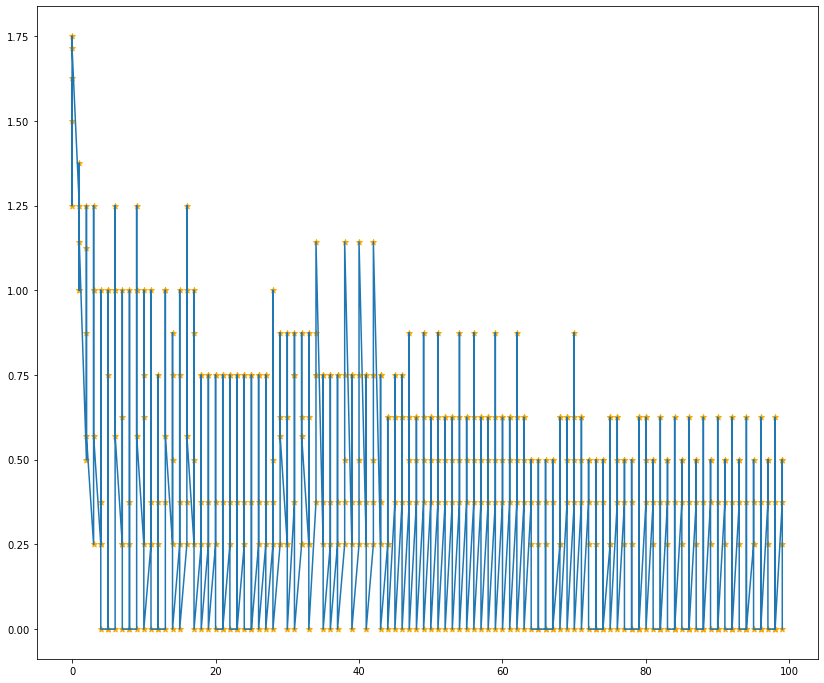

Score for verginica:  0.8
Mean Squared Error:  0.8


In [15]:
# class: setosa 0: versicolor 1. virginica: 2

# for setosa
c10 = logistic()
c10.fit_train(X_train,y_train_setosa)
y_pred = c10.predict(X_test)
mse = c10.mse(y_test_setosa, y_pred)
print("Score for Setosa: ", accuracy_score(y_test_setosa, y_pred))
print("Mean Squared Error: ", mse)
print()

# for versicolor
c11 = logistic()
c11.fit_train(X_train, y_train_versicolor)
y_pred = c11.predict(X_test)
mse = c11.mse(y_test_versicolor, y_pred)
print("Score for versicolor: ", accuracy_score(y_test_versicolor, y_pred))
print("Mean Squared Error: ", mse)
print()

# for virginica
c12 = logistic()
c12.fit_train(X_train, y_train_verginica)
y_pred = c12.predict(X_test)
mse = c12.mse(y_test_verginica, y_pred)
print("Score for verginica: ", accuracy_score(y_test_verginica, y_pred))
print("Mean Squared Error: ", mse)


### Model 5

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=0.1, random_state=42)

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  0.0

Iteration:  1  &  Mean Squared Error:  0.0

Iteration:  2  &  Mean Squared Error:  0.0

Iteration:  3  &  Mean Squared Error:  0.0

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.0

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.0

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.0

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.0

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  19  &  Mean Squared Error:  0.0

Iteration:  20  &  Mean Sq

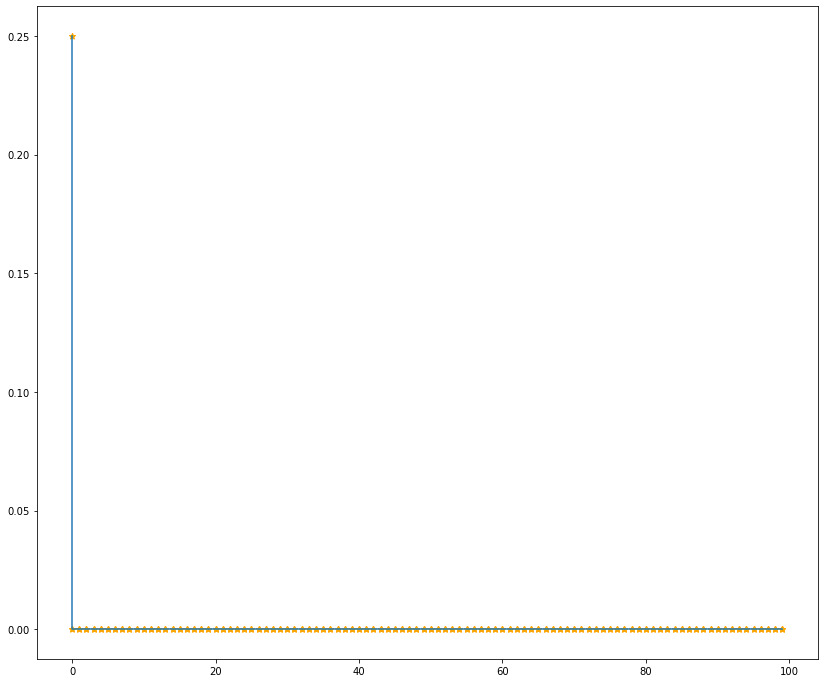

Score for Setosa:  1.0
Mean Squared Eror:  0.0

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  2.29

Iteration:  1  &  Mean Squared Error:  1.71

Iteration:  2  &  Mean Squared Error:  1.71

Iteration:  3  &  Mean Squared Error:  2.29

Iteration:  4  &  Mean Squared Error:  1.14

Iteration:  5  &  Mean Squared Error:  1.71

Iteration:  6  &  Mean Squared Error:  2.29

Iteration:  7  &  Mean Squared Error:  1.14

Iteration:  8  &  Mean Squared Error:  1.14

Iteration:  9  &  Mean Squared Error:  1.14

Iteration:  10  &  Mean Squared Error:  1.14

Iteration:  11  &  Mean Squared Error:  1.14

Iteration:  12  &  Mean Squared Error:  1.71

Iteration:  13  &  Mean Squared Error:  2.29

Iteration:  14  &  Mean Squared Error:  1.14

Iteration:  15  &  Mean Squared Error:  1.14

Iteration:  16  &  Mean Squared Error:  1.14

Iteration:  17  &  Mean Squared Error:  1.71

Iteration:  18  &  Mean Squared Error:  1.71

Iter

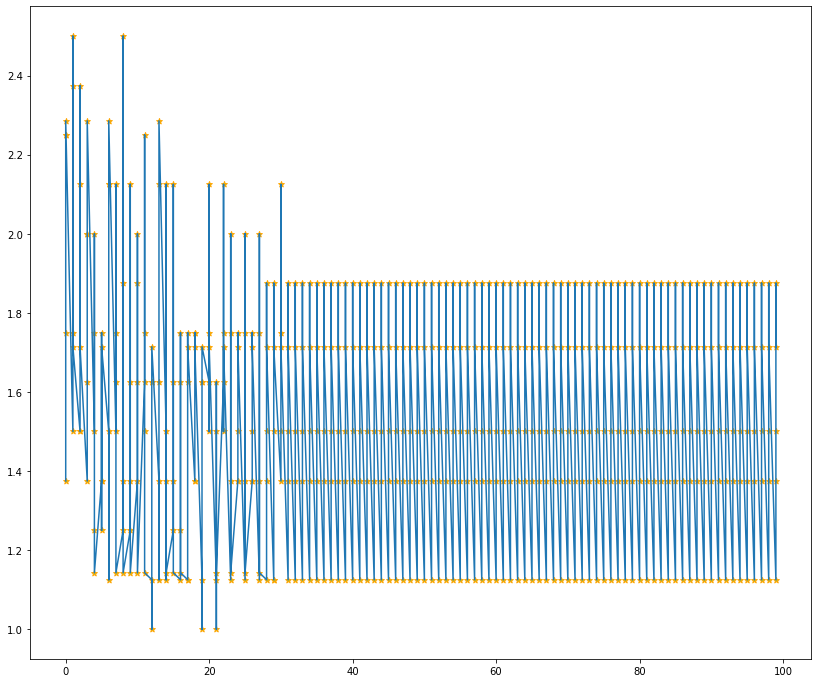

Score for versicolor:  0.7333333333333333
Mean Squared Eror:  1.0666666666666667

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  0.0

Iteration:  1  &  Mean Squared Error:  0.0

Iteration:  2  &  Mean Squared Error:  0.0

Iteration:  3  &  Mean Squared Error:  0.0

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  1.14

Iteration:  6  &  Mean Squared Error:  0.57

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.57

Iteration:  9  &  Mean Squared Error:  0.0

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.0

Iteration:  14  &  Mean Squared Error:  0.57

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.0

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Square

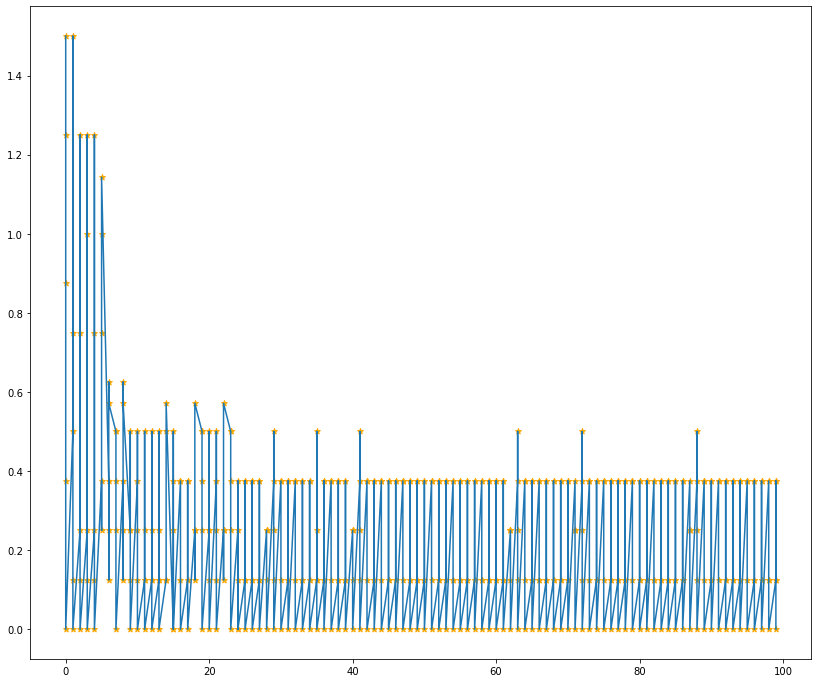

Score for verginica:  0.9333333333333333
Mean Squared Eror:  0.26666666666666666


In [17]:
# class: setosa 0: versicolor 1. virginica: 2

# for setosa
c13 = logistic()
c13.fit_train(X_train,y_train_setosa)
y_pred = c13.predict(X_test)
mse = c13.mse(y_test_setosa, y_pred)
print("Score for Setosa: ", accuracy_score(y_test_setosa, y_pred))
print("Mean Squared Eror: ", mse)
print()

# for versicolor
c14 = logistic()
c14.fit_train(X_train, y_train_versicolor)
y_pred = c14.predict(X_test)
mse = c14.mse(y_test_versicolor, y_pred)
print("Score for versicolor: ", accuracy_score(y_test_versicolor, y_pred))
print("Mean Squared Eror: ", mse)
print()

# for virginica
c15 = logistic()
c15.fit_train(X_train, y_train_verginica)
y_pred = c15.predict(X_test)
mse = c5.mse(y_test_verginica, y_pred)
print("Score for verginica: ", accuracy_score(y_test_verginica, y_pred))
print("Mean Squared Eror: ", mse)

### Model 6

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X6, y, test_size=0.1, random_state=42)

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  0.0

Iteration:  1  &  Mean Squared Error:  0.0

Iteration:  2  &  Mean Squared Error:  0.0

Iteration:  3  &  Mean Squared Error:  0.0

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.0

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.0

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.0

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.0

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  19  &  Mean Squared Error:  0.0

Iteration:  20  &  Mean Sq

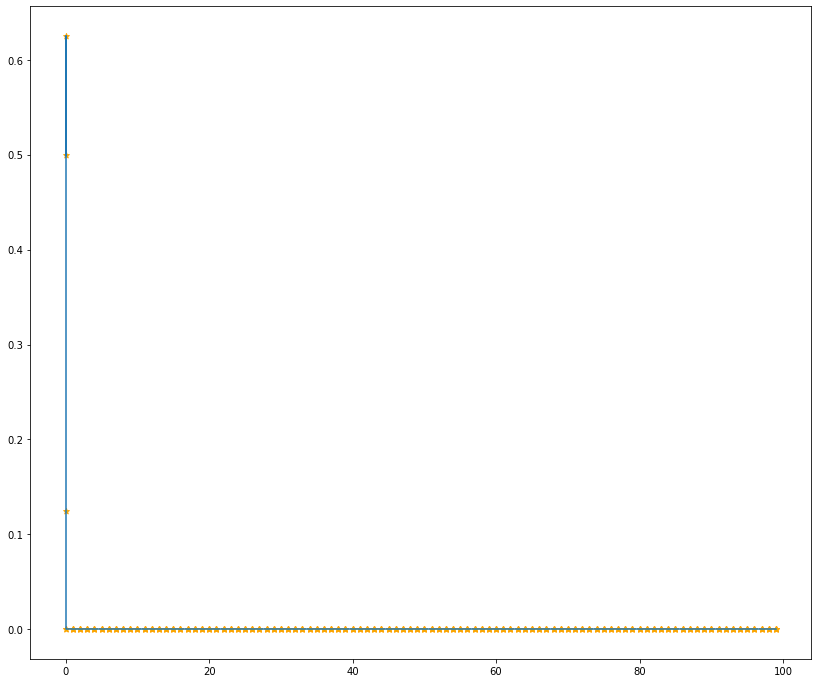

Score for Setosa:  1.0
Mean Squared Eror:  0.0

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  2.29

Iteration:  1  &  Mean Squared Error:  1.71

Iteration:  2  &  Mean Squared Error:  2.29

Iteration:  3  &  Mean Squared Error:  2.29

Iteration:  4  &  Mean Squared Error:  2.29

Iteration:  5  &  Mean Squared Error:  2.29

Iteration:  6  &  Mean Squared Error:  2.29

Iteration:  7  &  Mean Squared Error:  2.29

Iteration:  8  &  Mean Squared Error:  2.29

Iteration:  9  &  Mean Squared Error:  2.29

Iteration:  10  &  Mean Squared Error:  2.29

Iteration:  11  &  Mean Squared Error:  2.29

Iteration:  12  &  Mean Squared Error:  2.29

Iteration:  13  &  Mean Squared Error:  2.29

Iteration:  14  &  Mean Squared Error:  2.29

Iteration:  15  &  Mean Squared Error:  1.71

Iteration:  16  &  Mean Squared Error:  1.14

Iteration:  17  &  Mean Squared Error:  2.86

Iteration:  18  &  Mean Squared Error:  2.29

Iter

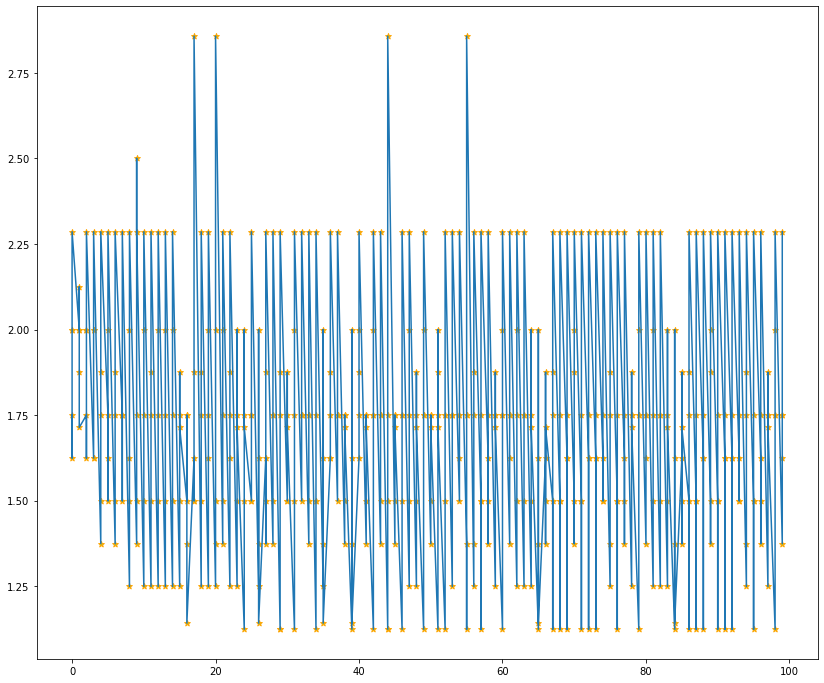

Score for versicolor:  0.6
Mean Squared Eror:  1.6

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  0.0

Iteration:  1  &  Mean Squared Error:  1.71

Iteration:  2  &  Mean Squared Error:  0.0

Iteration:  3  &  Mean Squared Error:  0.0

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.0

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  1.14

Iteration:  9  &  Mean Squared Error:  0.0

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.0

Iteration:  14  &  Mean Squared Error:  1.14

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.0

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  1.14

Iteration:  19 

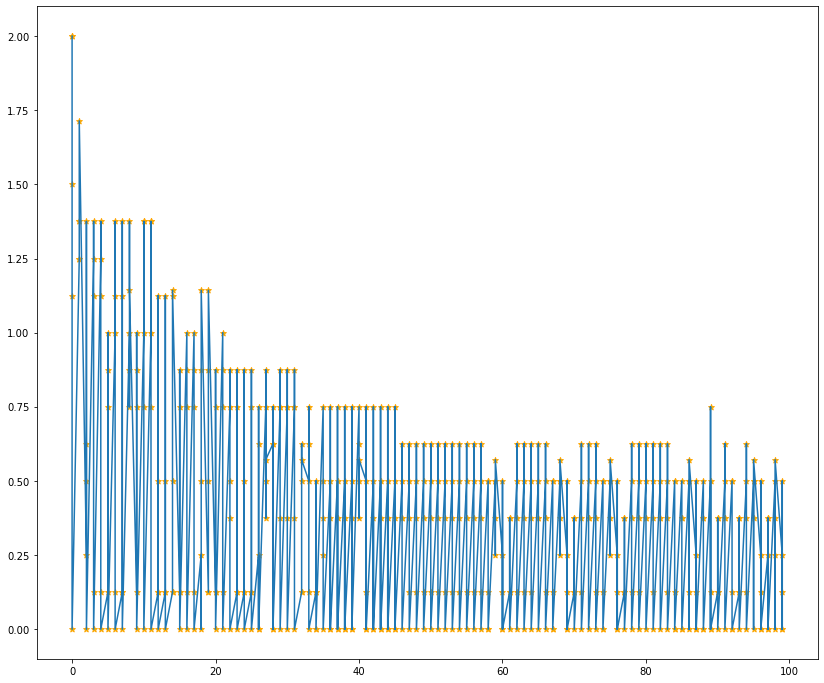

Score for verginica:  1.0
Mean Squared Eror:  0.0


In [19]:
# class: setosa 0: versicolor 1. virginica: 2

# for setosa
c16 = logistic()
c16.fit_train(X_train,y_train_setosa)
y_pred = c16.predict(X_test)
mse = c16.mse(y_test_setosa, y_pred)
print("Score for Setosa: ", accuracy_score(y_test_setosa, y_pred))
print("Mean Squared Eror: ", mse)
print()

# for versicolor
c17 = logistic()
c17.fit_train(X_train, y_train_versicolor)
y_pred = c17.predict(X_test)
mse = c17.mse(y_test_versicolor, y_pred)
print("Score for versicolor: ", accuracy_score(y_test_versicolor, y_pred))
print("Mean Squared Eror: ", mse)
print()

# for virginica
c18 = logistic()
c18.fit_train(X_train, y_train_verginica)
y_pred = c18.predict(X_test)
mse = c18.mse(y_test_verginica, y_pred)
print("Score for verginica: ", accuracy_score(y_test_verginica, y_pred))
print("Mean Squared Eror: ", mse)

## One of the feature combinations to test the effects of varying the learning rate α

**learning_rate = 0.0001, 0.001, 0.01, and 0.1 X4**

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  0.0

Iteration:  1  &  Mean Squared Error:  0.0

Iteration:  2  &  Mean Squared Error:  0.0

Iteration:  3  &  Mean Squared Error:  0.0

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.0

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.0

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.0

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.0

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  19  &  Mean Squared Error:  0.0

Iteration:  20  &  Mean Sq

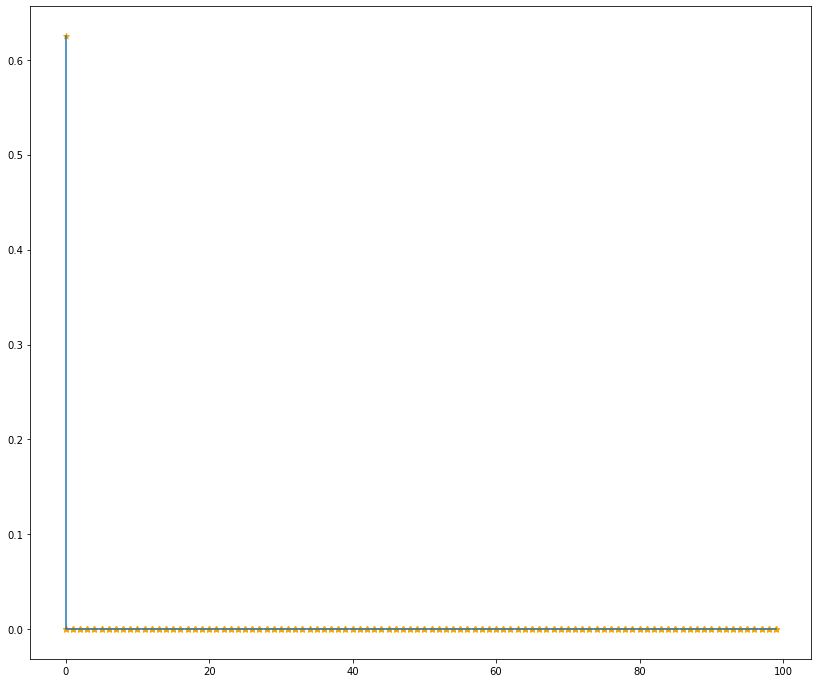

Learning Rate = 0.0001
-----------------------
Score for Setosa:  1.0

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  2.29

Iteration:  1  &  Mean Squared Error:  2.29

Iteration:  2  &  Mean Squared Error:  2.29

Iteration:  3  &  Mean Squared Error:  2.29

Iteration:  4  &  Mean Squared Error:  1.71

Iteration:  5  &  Mean Squared Error:  2.29

Iteration:  6  &  Mean Squared Error:  1.71

Iteration:  7  &  Mean Squared Error:  1.71

Iteration:  8  &  Mean Squared Error:  2.29

Iteration:  9  &  Mean Squared Error:  2.29

Iteration:  10  &  Mean Squared Error:  2.29

Iteration:  11  &  Mean Squared Error:  2.29

Iteration:  12  &  Mean Squared Error:  1.71

Iteration:  13  &  Mean Squared Error:  2.29

Iteration:  14  &  Mean Squared Error:  1.71

Iteration:  15  &  Mean Squared Error:  1.71

Iteration:  16  &  Mean Squared Error:  2.29

Iteration:  17  &  Mean Squared Error:  1.71

Iteration:  18  &  Mean Squ

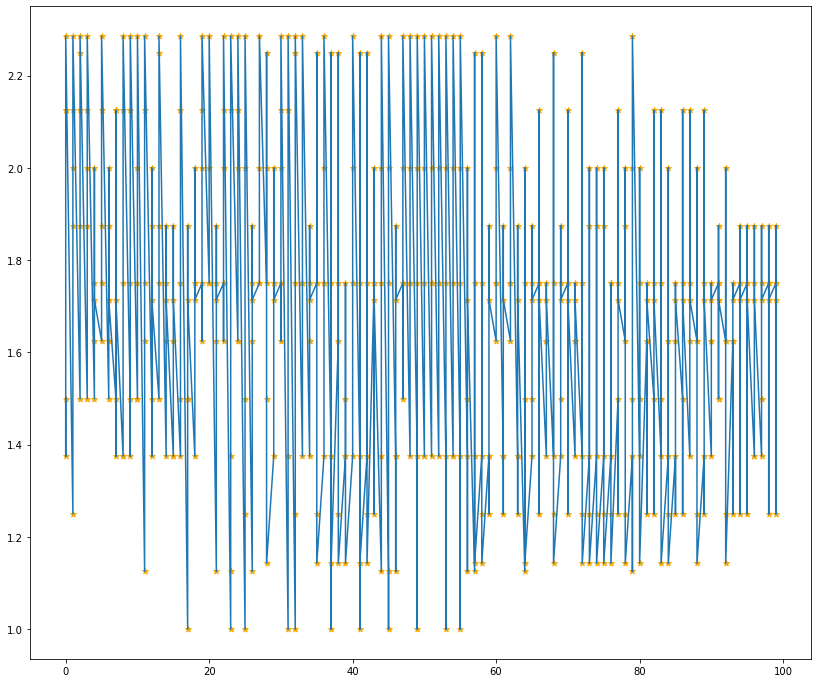

Score for versicolor:  0.6

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  1.71

Iteration:  1  &  Mean Squared Error:  1.14

Iteration:  2  &  Mean Squared Error:  0.57

Iteration:  3  &  Mean Squared Error:  0.57

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.57

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.57

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.57

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.57

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  19  &  Mean Squared Err

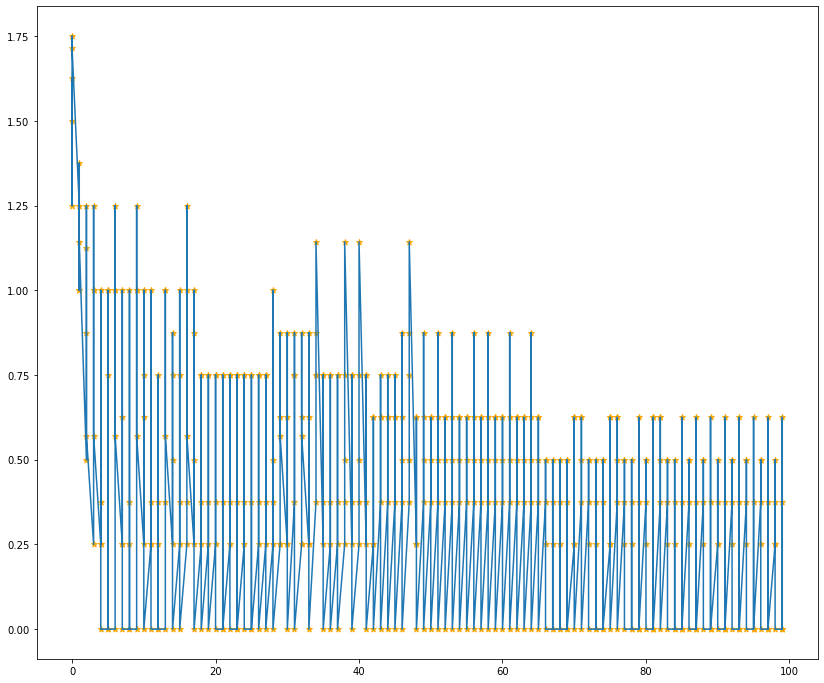

Score for verginica:  0.8

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  0.0

Iteration:  1  &  Mean Squared Error:  0.0

Iteration:  2  &  Mean Squared Error:  0.0

Iteration:  3  &  Mean Squared Error:  0.0

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.0

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.0

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.0

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.0

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  19  &  Mean Squared Error:  0.0


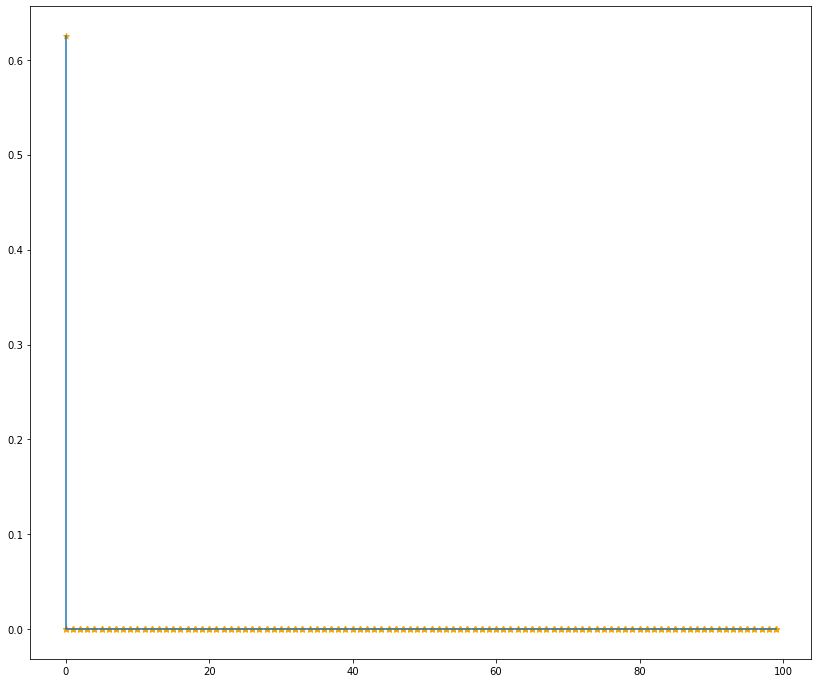

Learning Rate = 0.001
-----------------------
Score for Setosa:  1.0

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  2.29

Iteration:  1  &  Mean Squared Error:  2.29

Iteration:  2  &  Mean Squared Error:  2.29

Iteration:  3  &  Mean Squared Error:  2.29

Iteration:  4  &  Mean Squared Error:  1.71

Iteration:  5  &  Mean Squared Error:  2.29

Iteration:  6  &  Mean Squared Error:  1.71

Iteration:  7  &  Mean Squared Error:  1.71

Iteration:  8  &  Mean Squared Error:  2.29

Iteration:  9  &  Mean Squared Error:  2.29

Iteration:  10  &  Mean Squared Error:  2.29

Iteration:  11  &  Mean Squared Error:  2.29

Iteration:  12  &  Mean Squared Error:  1.71

Iteration:  13  &  Mean Squared Error:  2.29

Iteration:  14  &  Mean Squared Error:  1.71

Iteration:  15  &  Mean Squared Error:  1.71

Iteration:  16  &  Mean Squared Error:  2.29

Iteration:  17  &  Mean Squared Error:  1.71

Iteration:  18  &  Mean Squa

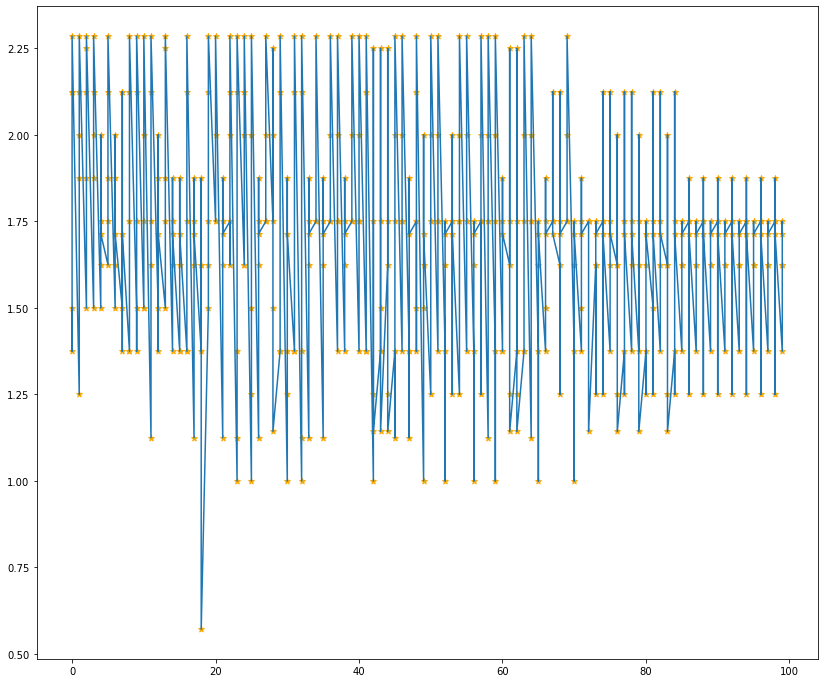

Score for versicolor:  0.6666666666666666

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  1.71

Iteration:  1  &  Mean Squared Error:  1.14

Iteration:  2  &  Mean Squared Error:  0.57

Iteration:  3  &  Mean Squared Error:  0.57

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.57

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.57

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.57

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.57

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  19  &  M

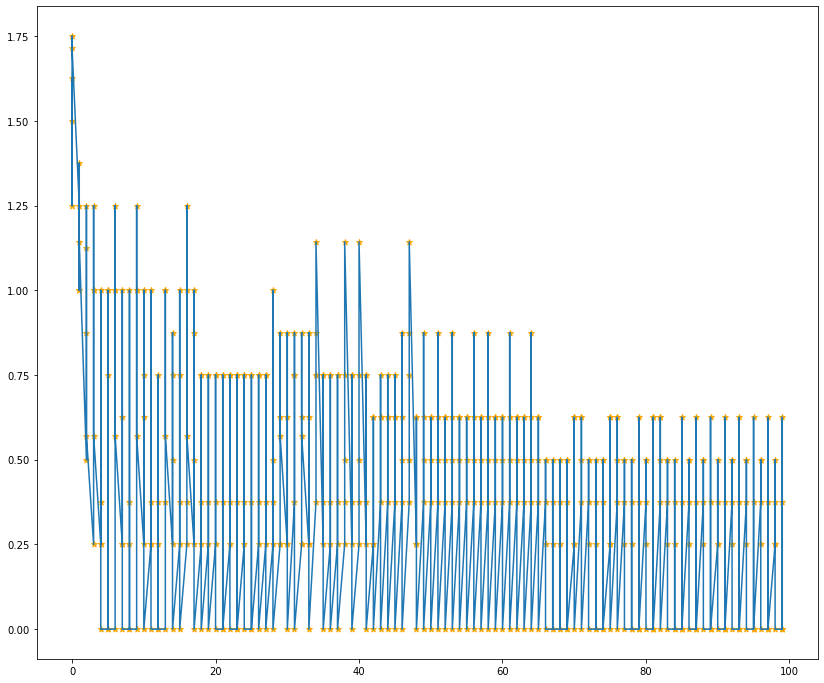

Score for verginica:  0.8

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  0.0

Iteration:  1  &  Mean Squared Error:  0.0

Iteration:  2  &  Mean Squared Error:  0.0

Iteration:  3  &  Mean Squared Error:  0.0

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.0

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.0

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.0

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.0

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  19  &  Mean Squared Error:  0.0


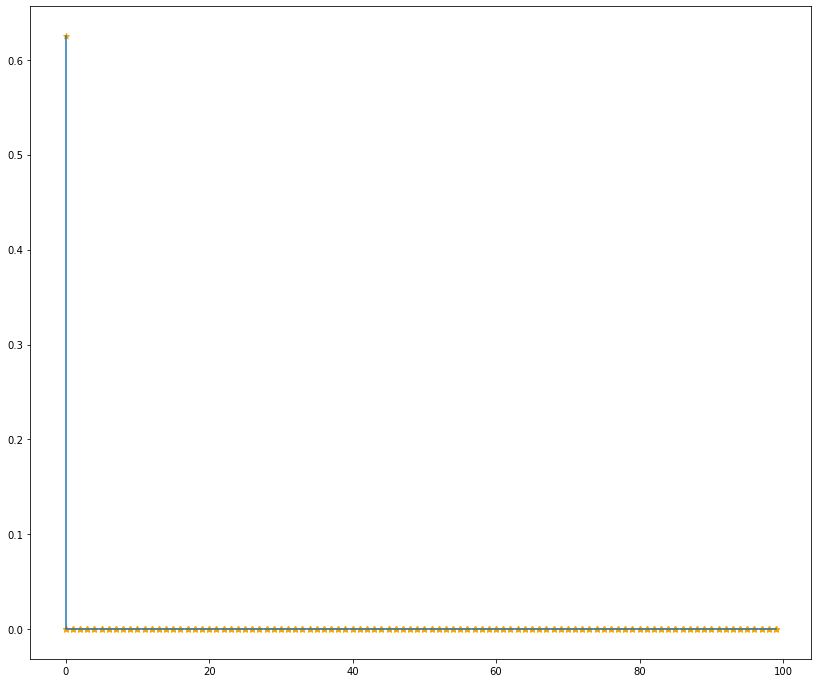

Learning Rate = 0.01
-----------------------
Score for Setosa:  1.0

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  2.29

Iteration:  1  &  Mean Squared Error:  2.29

Iteration:  2  &  Mean Squared Error:  2.29

Iteration:  3  &  Mean Squared Error:  2.29

Iteration:  4  &  Mean Squared Error:  1.71

Iteration:  5  &  Mean Squared Error:  2.29

Iteration:  6  &  Mean Squared Error:  1.71

Iteration:  7  &  Mean Squared Error:  1.71

Iteration:  8  &  Mean Squared Error:  2.29

Iteration:  9  &  Mean Squared Error:  2.29

Iteration:  10  &  Mean Squared Error:  2.29

Iteration:  11  &  Mean Squared Error:  2.29

Iteration:  12  &  Mean Squared Error:  1.71

Iteration:  13  &  Mean Squared Error:  2.29

Iteration:  14  &  Mean Squared Error:  1.71

Iteration:  15  &  Mean Squared Error:  1.71

Iteration:  16  &  Mean Squared Error:  2.29

Iteration:  17  &  Mean Squared Error:  1.71

Iteration:  18  &  Mean Squar

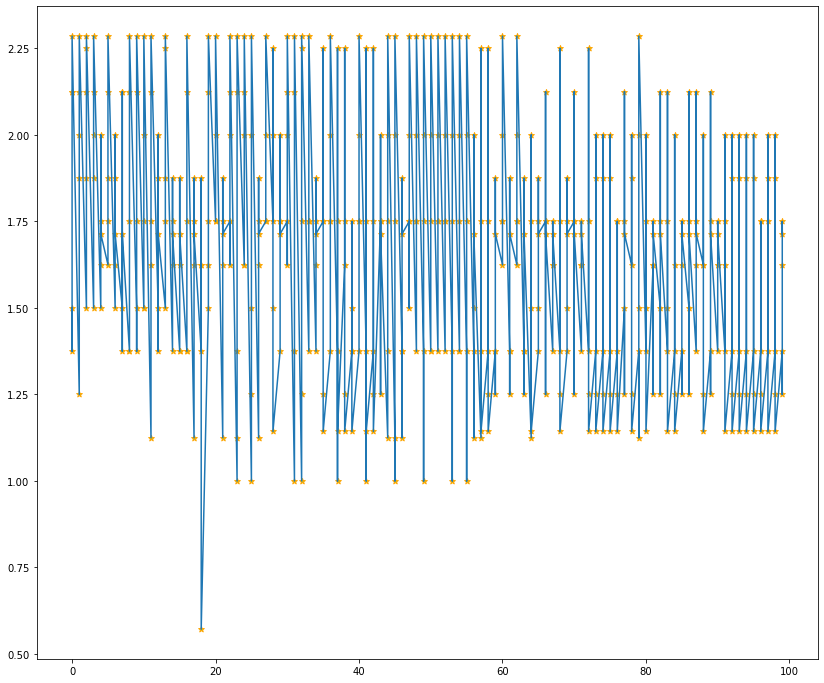

Score for versicolor:  0.6666666666666666

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  1.71

Iteration:  1  &  Mean Squared Error:  1.14

Iteration:  2  &  Mean Squared Error:  0.57

Iteration:  3  &  Mean Squared Error:  0.57

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.57

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.57

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.57

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.57

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  19  &  M

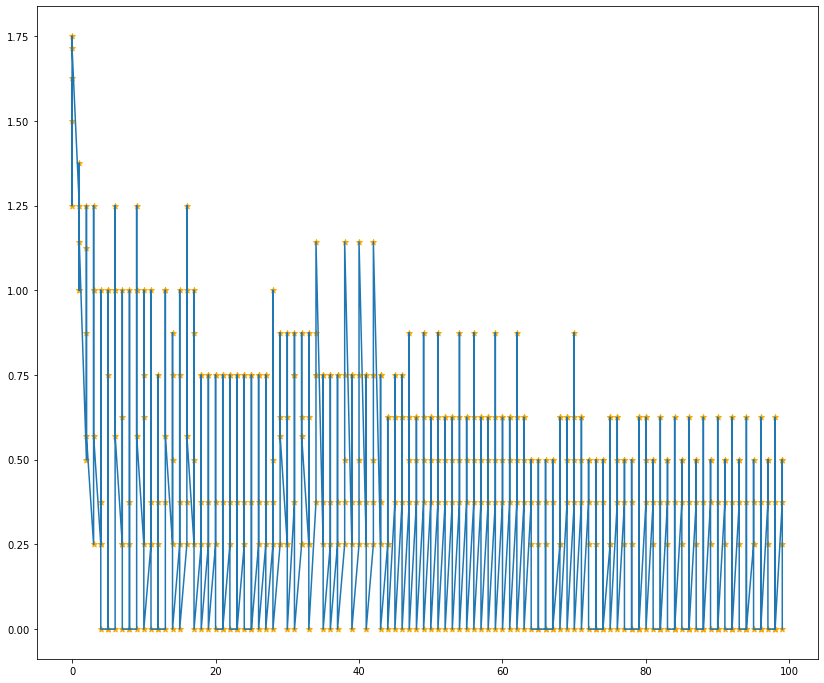

Score for verginica:  0.8

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  0.0

Iteration:  1  &  Mean Squared Error:  0.0

Iteration:  2  &  Mean Squared Error:  0.0

Iteration:  3  &  Mean Squared Error:  0.0

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.0

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.0

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.0

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.0

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  19  &  Mean Squared Error:  0.0


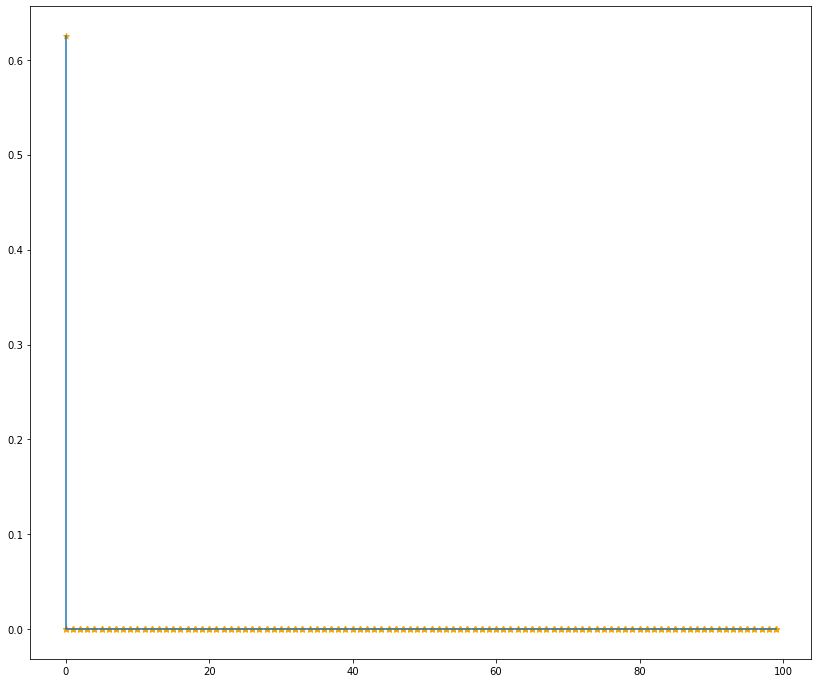

Learning Rate = 0.1
-----------------------
Score for Setosa:  1.0

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  2.29

Iteration:  1  &  Mean Squared Error:  2.29

Iteration:  2  &  Mean Squared Error:  2.29

Iteration:  3  &  Mean Squared Error:  2.29

Iteration:  4  &  Mean Squared Error:  1.71

Iteration:  5  &  Mean Squared Error:  2.29

Iteration:  6  &  Mean Squared Error:  1.71

Iteration:  7  &  Mean Squared Error:  1.71

Iteration:  8  &  Mean Squared Error:  2.29

Iteration:  9  &  Mean Squared Error:  2.29

Iteration:  10  &  Mean Squared Error:  2.29

Iteration:  11  &  Mean Squared Error:  2.29

Iteration:  12  &  Mean Squared Error:  1.71

Iteration:  13  &  Mean Squared Error:  2.29

Iteration:  14  &  Mean Squared Error:  1.71

Iteration:  15  &  Mean Squared Error:  1.71

Iteration:  16  &  Mean Squared Error:  2.29

Iteration:  17  &  Mean Squared Error:  1.71

Iteration:  18  &  Mean Square

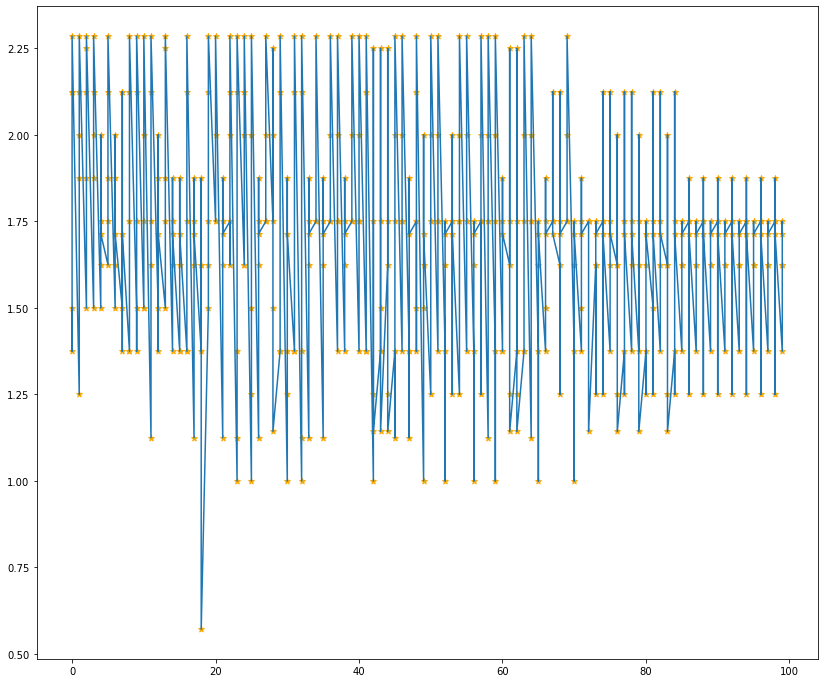

Score for versicolor:  0.6666666666666666

Current Iteration and Mean Squared Errror
-----------------------------------------
Iteration:  0  &  Mean Squared Error:  1.71

Iteration:  1  &  Mean Squared Error:  1.14

Iteration:  2  &  Mean Squared Error:  0.57

Iteration:  3  &  Mean Squared Error:  0.57

Iteration:  4  &  Mean Squared Error:  0.0

Iteration:  5  &  Mean Squared Error:  0.0

Iteration:  6  &  Mean Squared Error:  0.57

Iteration:  7  &  Mean Squared Error:  0.0

Iteration:  8  &  Mean Squared Error:  0.0

Iteration:  9  &  Mean Squared Error:  0.57

Iteration:  10  &  Mean Squared Error:  0.0

Iteration:  11  &  Mean Squared Error:  0.0

Iteration:  12  &  Mean Squared Error:  0.0

Iteration:  13  &  Mean Squared Error:  0.57

Iteration:  14  &  Mean Squared Error:  0.0

Iteration:  15  &  Mean Squared Error:  0.0

Iteration:  16  &  Mean Squared Error:  0.57

Iteration:  17  &  Mean Squared Error:  0.0

Iteration:  18  &  Mean Squared Error:  0.0

Iteration:  19  &  M

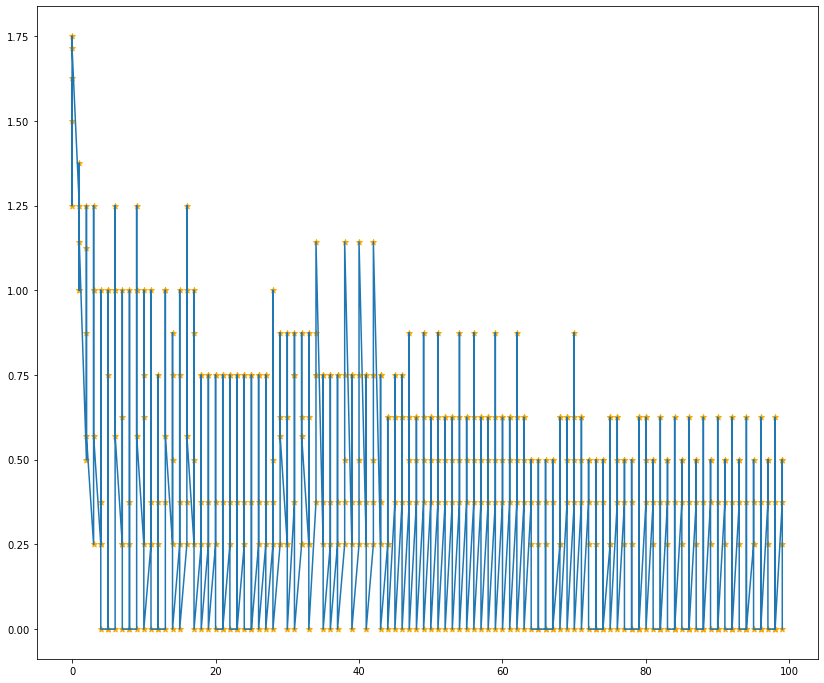

Score for verginica:  0.8


In [20]:

## learning_rate = 0.0001
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.1, random_state=42)
# for setosa
model_lr_1 = logistic()
model_lr_1.fit_train(X_train, y_train_setosa,learning_rate = 0.0001)
y_pred = model_lr_1.predict(X_test)
print("Learning Rate = 0.0001")
print('-----------------------')
print("Score for Setosa: ", accuracy_score(y_test_setosa, y_pred))
print()

# for versicolor
model_lr_2 = logistic()
model_lr_2.fit_train(X_train, y_train_versicolor,learning_rate = 0.0001)
y_pred = model_lr_2.predict(X_test)
print("Score for versicolor: ", accuracy_score(y_test_versicolor, y_pred))
print()

# for virginica
model_lr_3 = logistic()
model_lr_3.fit_train(X_train,y_train_verginica,learning_rate = 0.0001)
y_pred = model_lr_3.predict(X_test)
print("Score for verginica: ", accuracy_score(y_test_verginica, y_pred))
print()

# learning rate = 0.001
#----------------------
# for setosa
model_lr_4 = logistic()
model_lr_4.fit_train(X_train, y_train_setosa,learning_rate = 0.001)
y_pred = model_lr_4.predict(X_test)
print("Learning Rate = 0.001")
print('-----------------------')
print("Score for Setosa: ", accuracy_score(y_test_setosa, y_pred))
print()

# for versicolor
model_lr_5 = logistic()
model_lr_5.fit_train(X_train, y_train_versicolor,learning_rate = 0.001)
y_pred = model_lr_5.predict(X_test)
print("Score for versicolor: ", accuracy_score(y_test_versicolor, y_pred))
print()

# for virginica
model_lr_6 = logistic()
model_lr_6.fit_train(X_train,y_train_verginica,learning_rate = 0.001)
y_pred = model_lr_6.predict(X_test)
print("Score for verginica: ", accuracy_score(y_test_verginica, y_pred))
print()

# learning rate = 0.01
# --------------------

# for setosa
model_lr_7 = logistic()
model_lr_7.fit_train(X_train, y_train_setosa,learning_rate = 0.01)
y_pred = model_lr_7.predict(X_test)
print("Learning Rate = 0.01")
print('-----------------------')
print("Score for Setosa: ", accuracy_score(y_test_setosa, y_pred))
print()

# for versicolor
model_lr_8 = logistic()
model_lr_8.fit_train(X_train, y_train_versicolor,learning_rate = 0.01)
y_pred = model_lr_8.predict(X_test)
print("Score for versicolor: ", accuracy_score(y_test_versicolor, y_pred))
print()

# for virginica
model_lr_9 = logistic()
model_lr_9.fit_train(X_train,y_train_verginica,learning_rate = 0.01)
y_pred = model_lr_9.predict(X_test)
print("Score for verginica: ", accuracy_score(y_test_verginica, y_pred))
print()



# learning rate = 0.1
# -------------------

# for setosa
model_lr_10 = logistic()
model_lr_10.fit_train(X_train, y_train_setosa,learning_rate = 0.1)
y_pred = model_lr_10.predict(X_test)
print("Learning Rate = 0.1")
print('-----------------------')
print("Score for Setosa: ", accuracy_score(y_test_setosa, y_pred))
print()

# for versicolor
model_lr_11 = logistic()
model_lr_11.fit_train(X_train, y_train_versicolor,learning_rate = 0.1)
y_pred = model_lr_11.predict(X_test)
print("Score for versicolor: ", accuracy_score(y_test_versicolor, y_pred))
print()

# for virginica
model_lr_12 = logistic()
model_lr_12.fit_train(X_train,y_train_verginica,learning_rate = 0.1)
y_pred = model_lr_12.predict(X_test)
print("Score for verginica: ", accuracy_score(y_test_verginica, y_pred))